In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
con = sqlite3.connect(r"C:\Users\User\Downloads\Resources\zomato_rawdata.sqlite")

In [3]:
df = pd.read_sql_query('SELECT * FROM USERS',con)

In [4]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [6]:
df.isna().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [7]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
df['rate'].replace(('NEW','-'),np.nan, inplace=True)

In [9]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0])if type(x)==str else x)

In [11]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [12]:
x = pd.crosstab(df['rate'], df['online_order'])

In [13]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<AxesSubplot: xlabel='rate'>

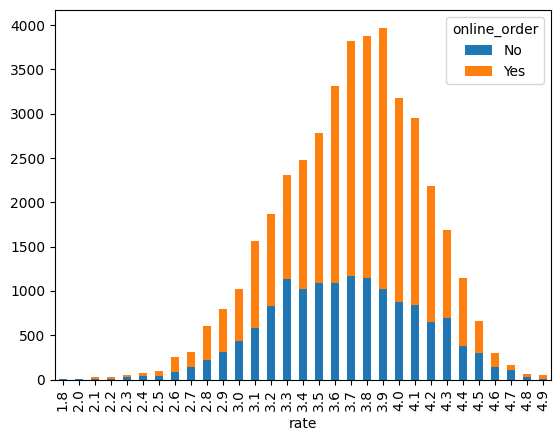

In [14]:
x.plot(kind='bar', stacked=True)

In [15]:
norm_df = x.div(x.sum(axis=1).astype(float), axis=0)

<AxesSubplot: xlabel='rate'>

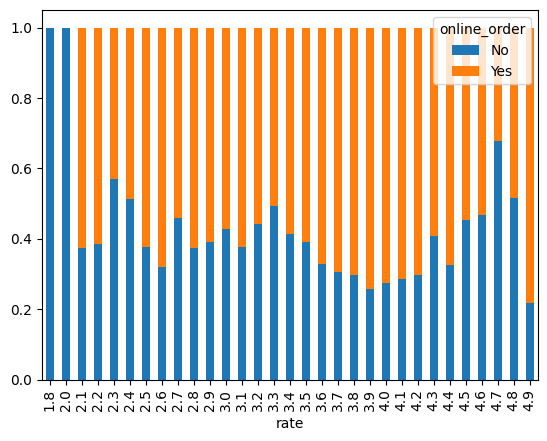

In [16]:
norm_df.plot(kind='bar', stacked=True)

In [17]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', None, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
     

In [18]:

df=df.dropna(subset=['rest_type'])

In [19]:
kiosk = df[df['rest_type'].str.contains('Kiosk')]

In [20]:
kiosk.shape

(192, 18)

In [21]:
kiosk['reviews_list']

347      [('Rated 4.0', 'RATED\n  Tried chocolate ,pist...
977      [('Rated 5.0', 'RATED\n  Outstanding Cheese co...
1136     [('Rated 1.0', "RATED\n  One of the shittiest ...
1276     [('Rated 4.0', 'RATED\n  They have many kinds ...
1285     [('Rated 5.0', 'RATED\n  Loved the regular dab...
                               ...                        
51230    [('Rated 5.0', 'RATED\n  In the tech city of B...
51236    [('Rated 3.0', 'RATED\n  Situated inside Prest...
51239    [('Rated 3.0', 'RATED\n  Located inside food c...
51252    [('Rated 2.0', "RATED\n  This is a very cheap,...
51270    [('Rated 5.0', 'RATED\n  Nice food and great s...
Name: reviews_list, Length: 192, dtype: object

In [22]:
kiosk['reviews_list'] = kiosk['reviews_list'].apply(lambda x:x.lower())

C:\Users\User\AppData\Local\Temp\ipykernel_26912\1164770714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kiosk['reviews_list'] = kiosk['reviews_list'].apply(lambda x:x.lower())


In [23]:
kiosk['reviews_list']

347      [('rated 4.0', 'rated\n  tried chocolate ,pist...
977      [('rated 5.0', 'rated\n  outstanding cheese co...
1136     [('rated 1.0', "rated\n  one of the shittiest ...
1276     [('rated 4.0', 'rated\n  they have many kinds ...
1285     [('rated 5.0', 'rated\n  loved the regular dab...
                               ...                        
51230    [('rated 5.0', 'rated\n  in the tech city of b...
51236    [('rated 3.0', 'rated\n  situated inside prest...
51239    [('rated 3.0', 'rated\n  located inside food c...
51252    [('rated 2.0', "rated\n  this is a very cheap,...
51270    [('rated 5.0', 'rated\n  nice food and great s...
Name: reviews_list, Length: 192, dtype: object

In [24]:
from nltk.corpus import RegexpTokenizer

In [25]:
tokenizer  = RegexpTokenizer('[a-zA-Z]+')

In [26]:
kiosk_tokenizer = kiosk['reviews_list'].apply(tokenizer.tokenize)

In [27]:
kiosk_tokenizer

347      [rated, rated, n, tried, chocolate, pista, man...
977      [rated, rated, n, outstanding, cheese, corn, m...
1136     [rated, rated, n, one, of, the, shittiest, mom...
1276     [rated, rated, n, they, have, many, kinds, of,...
1285     [rated, rated, n, loved, the, regular, dabeli,...
                               ...                        
51230    [rated, rated, n, in, the, tech, city, of, ban...
51236    [rated, rated, n, situated, inside, prestige, ...
51239    [rated, rated, n, located, inside, food, court...
51252    [rated, rated, n, this, is, a, very, cheap, ye...
51270    [rated, rated, n, nice, food, and, great, serv...
Name: reviews_list, Length: 192, dtype: object

In [28]:
from nltk.corpus import stopwords

In [29]:
stop = stopwords.words('english')

In [30]:
 stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [31]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
kiosk_clean = kiosk_tokenizer.apply( lambda each_review: [token for token in each_review if token not in stop])

In [33]:
kiosk_clean

347      [tried, chocolate, pista, mango, kulfi, kids, ...
977      [outstanding, cheese, corn, momos, equally, de...
1136     [one, shittiest, momo, ever, come, place, prep...
1276     [many, kinds, different, waffles, must, visit,...
1285     [loved, regular, dabeli, fresh, good, taste, w...
                               ...                        
51230    [tech, city, bangalore, find, taste, bengal, n...
51236    [situated, inside, prestige, shantiniketan, ma...
51239    [located, inside, food, court, tried, exotic, ...
51252    [cheap, yet, decent, place, fill, tummy, area,...
51270    [nice, food, great, service, keep, like, bonel...
Name: reviews_list, Length: 192, dtype: object

In [34]:
from nltk import FreqDist, bigrams, trigrams

In [35]:
type(kiosk_clean)

pandas.core.series.Series

In [36]:
kiosk_2d = list(kiosk_clean)

In [37]:
kiosk_2d

[['tried',
  'chocolate',
  'pista',
  'mango',
  'kulfi',
  'kids',
  'really',
  'enjoyed',
  'custard',
  'falooda',
  'ice',
  'cream',
  'also',
  'good',
  'need',
  'try',
  'kesar',
  'lassi',
  'next',
  'time',
  'small',
  'shop',
  'decent',
  'price',
  'good',
  'desserts',
  'fresh',
  'like',
  'every',
  'store',
  'pros',
  'cons',
  'hot',
  'menus',
  'good',
  'gulab',
  'jamoon',
  'kajar',
  'halwa',
  'cold',
  'ghulkand',
  'malawi',
  'anjeer',
  'kulfis',
  'rabdi',
  'good',
  'felt',
  'rose',
  'badam',
  'milks',
  'overpriced',
  'food',
  'spoilt',
  'missing',
  'food',
  'items',
  'one',
  'worst',
  'place',
  'ni',
  'ordered',
  'rabadi',
  'rass',
  'malai',
  'food',
  'poisoning',
  'ni',
  'called',
  'owner',
  'made',
  'clear',
  'make',
  'fresh',
  'make',
  'sure',
  'hygiene',
  'ni',
  'would',
  'request',
  'reading',
  'please',
  'go',
  'favorite',
  'indian',
  'dessert',
  'doodh',
  'pheni',
  'smiple',
  'dessert',
  'made',
 

In [38]:
kiosk_1d = []
for i in kiosk_2d:
    for word in i:
        kiosk_1d.append(word)

In [39]:
kiosk_1d

['tried',
 'chocolate',
 'pista',
 'mango',
 'kulfi',
 'kids',
 'really',
 'enjoyed',
 'custard',
 'falooda',
 'ice',
 'cream',
 'also',
 'good',
 'need',
 'try',
 'kesar',
 'lassi',
 'next',
 'time',
 'small',
 'shop',
 'decent',
 'price',
 'good',
 'desserts',
 'fresh',
 'like',
 'every',
 'store',
 'pros',
 'cons',
 'hot',
 'menus',
 'good',
 'gulab',
 'jamoon',
 'kajar',
 'halwa',
 'cold',
 'ghulkand',
 'malawi',
 'anjeer',
 'kulfis',
 'rabdi',
 'good',
 'felt',
 'rose',
 'badam',
 'milks',
 'overpriced',
 'food',
 'spoilt',
 'missing',
 'food',
 'items',
 'one',
 'worst',
 'place',
 'ni',
 'ordered',
 'rabadi',
 'rass',
 'malai',
 'food',
 'poisoning',
 'ni',
 'called',
 'owner',
 'made',
 'clear',
 'make',
 'fresh',
 'make',
 'sure',
 'hygiene',
 'ni',
 'would',
 'request',
 'reading',
 'please',
 'go',
 'favorite',
 'indian',
 'dessert',
 'doodh',
 'pheni',
 'smiple',
 'dessert',
 'made',
 'pheni',
 'sweet',
 'badam',
 'milk',
 'mumbai',
 'badam',
 'milk',
 'lassi',
 'centre',
 

In [40]:
fd = FreqDist()

In [41]:
for i in kiosk_1d:
    fd[i] = fd[i]+1

In [42]:
fd.most_common(20)

[('good', 807),
 ('place', 684),
 ('ice', 653),
 ('taste', 559),
 ('cream', 462),
 ('food', 433),
 ('really', 356),
 ('chocolate', 349),
 ('try', 338),
 ('great', 319),
 ('f', 289),
 ('ordered', 288),
 ('chicken', 278),
 ('brownie', 267),
 ('awesome', 257),
 ('like', 251),
 ('would', 246),
 ('also', 238),
 ('service', 238),
 ('one', 237)]

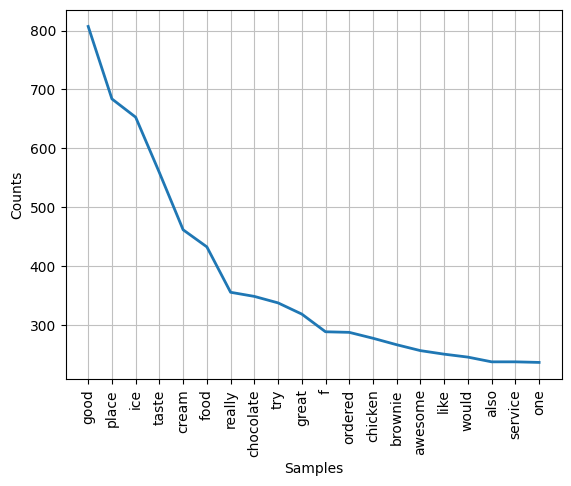

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [43]:
fd.plot(20)

In [44]:
bi_grams = bigrams(kiosk_1d)

In [45]:
bi_grams

<generator object bigrams at 0x000001833943ED50>

In [46]:
fd_b = FreqDist()

In [47]:
for bigram in bi_grams:
    fd_b[bigram] = fd_b[bigram]+1

In [48]:
fd_b.most_common(20)

[(('ice', 'cream'), 441),
 (('ice', 'creams'), 208),
 (('f', 'f'), 176),
 (('dark', 'chocolate'), 149),
 (('must', 'try'), 136),
 (('chocolate', 'brownie'), 107),
 (('nutty', 'squirrel'), 97),
 (('really', 'good'), 87),
 (('would', 'recommend'), 71),
 (('vada', 'pav'), 71),
 (('great', 'taste'), 70),
 (('really', 'nice'), 59),
 (('cream', 'sandwiches'), 59),
 (('brownie', 'sundae'), 58),
 (('rmz', 'ecoworld'), 56),
 (('cream', 'sandwich'), 56),
 (('also', 'good'), 53),
 (('cream', 'dark'), 49),
 (('awesome', 'taste'), 46),
 (('pizza', 'stop'), 44)]

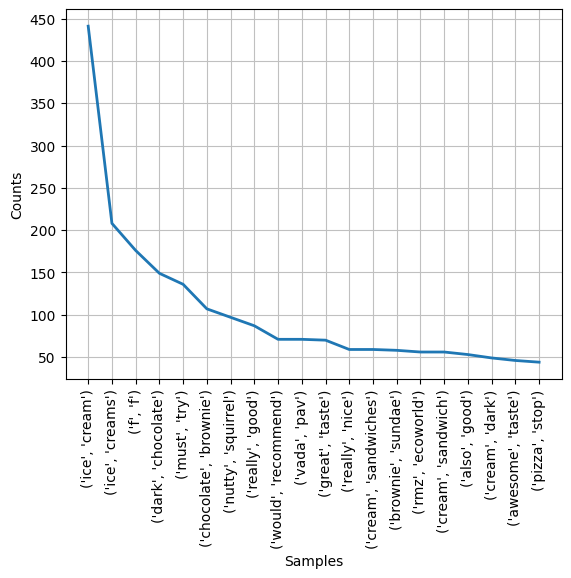

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [49]:
fd_b.plot(20)

In [50]:
tri_grams = trigrams(kiosk_1d)

In [51]:
fd_t = FreqDist()

In [52]:
for trigram in tri_grams:
    fd_t[trigram] = fd_t[trigram]+1

In [53]:
fd_t.most_common(20)

[(('f', 'f', 'f'), 130),
 (('ice', 'cream', 'sandwiches'), 59),
 (('dark', 'chocolate', 'brownie'), 56),
 (('ice', 'cream', 'dark'), 49),
 (('cream', 'dark', 'chocolate'), 49),
 (('ice', 'cream', 'sandwich'), 44),
 (('flavours', 'ice', 'cream'), 42),
 (('nutty', 'squirrel', 'offers'), 39),
 (('place', 'must', 'try'), 37),
 (('variety', 'ice', 'creams'), 32),
 (('overall', 'good', 'experience'), 32),
 (('ice', 'cream', 'ever'), 32),
 (('taste', 'would', 'recommend'), 28),
 (('dark', 'chocolate', 'ice'), 28),
 (('ice', 'creams', 'great'), 28),
 (('would', 'recommend', 'place'), 28),
 (('ice', 'cream', 'flavors'), 26),
 (('yummmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmyummmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmyummmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm',
   'good',
   'ice'),
  25),
 (('good', 'ice', 'cream'), 25),
 (('ice', 'cream', 'nthis'), 25)]

# Extracting geographical coordinates from data

In [54]:
!pip install geopy
!pip install geocoder

In [55]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [56]:
len(df['location'].unique())

93

In [57]:
### Lets add 'Bangalore , Karnataka , India' so that u will get more more accurate geographical co-ordinates..

df['location'] = df['location']+ ', Bangalore , Karnataka, India'

In [58]:
df['location']

0               Banashankari, Bangalore , Karnataka, India
1               Banashankari, Bangalore , Karnataka, India
2               Banashankari, Bangalore , Karnataka, India
3               Banashankari, Bangalore , Karnataka, India
4               Basavanagudi, Bangalore , Karnataka, India
                               ...                        
51712             Whitefield, Bangalore , Karnataka, India
51713             Whitefield, Bangalore , Karnataka, India
51714             Whitefield, Bangalore , Karnataka, India
51715    ITPL Main Road, Whitefield, Bangalore , Karnat...
51716    ITPL Main Road, Whitefield, Bangalore , Karnat...
Name: location, Length: 51490, dtype: object

In [59]:
dfc = df.copy()

In [60]:
dfc['location'].isna().sum()

0

In [61]:
location = pd.DataFrame(df['location'].unique())

In [62]:
location

,0
0,"Banashankari, Bangalore , Karnataka, India"
1,"Basavanagudi, Bangalore , Karnataka, India"
2,"Mysore Road, Bangalore , Karnataka, India"
3,"Jayanagar, Bangalore , Karnataka, India"
4,"Kumaraswamy Layout, Bangalore , Karnataka, India"
...,...
88,"West Bangalore, Bangalore , Karnataka, India"
89,"Magadi Road, Bangalore , Karnataka, India"
90,"Yelahanka, Bangalore , Karnataka, India"
91,"Sahakara Nagar, Bangalore , Karnataka, India"


In [63]:
location.columns = ['name']

In [64]:
location

,name
0,"Banashankari, Bangalore , Karnataka, India"
1,"Basavanagudi, Bangalore , Karnataka, India"
2,"Mysore Road, Bangalore , Karnataka, India"
3,"Jayanagar, Bangalore , Karnataka, India"
4,"Kumaraswamy Layout, Bangalore , Karnataka, India"
...,...
88,"West Bangalore, Bangalore , Karnataka, India"
89,"Magadi Road, Bangalore , Karnataka, India"
90,"Yelahanka, Bangalore , Karnataka, India"
91,"Sahakara Nagar, Bangalore , Karnataka, India"


In [65]:
from geopy.geocoders import Nominatim

In [66]:
### assign timeout=None in order to get rid of timeout error..
geolocator = Nominatim(user_agent="app" , timeout=None)

In [67]:
lat = []
lon = []

for locations in location['name']:
    locations = geolocator.geocode(locations)
    if locations is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(locations.latitude)
        lon.append(locations.longitude)

In [68]:
location['latitude'] = lat
location['longitude'] = lon

In [69]:
location

,name,latitude,longitude
0,"Banashankari, Bangalore , Karnataka, India",12.939333,77.553982
1,"Basavanagudi, Bangalore , Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore , Karnataka, India",12.956875,77.549506
3,"Jayanagar, Bangalore , Karnataka, India",12.939904,77.582638
4,"Kumaraswamy Layout, Bangalore , Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore, Bangalore , Karnataka, India",13.009652,77.553054
89,"Magadi Road, Bangalore , Karnataka, India",12.975653,77.555355
90,"Yelahanka, Bangalore , Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore , Karnataka, India",13.062147,77.580061


# Building geographical heatmaps

In [70]:
location.isna().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [71]:
location[location['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar, Bangalore , Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore , Karnataka, India",NaN,NaN


In [72]:
### lets take help of google in such circumstances..
### google as "co-ordinates of St. Marks Road bengalore" , so co-ordinates as :
### 12.9764122° N(Latitude), 77.6017437° E(Longitude)

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
location['latitude'][79] = 13.0163
location['longitude'][79] = 77.6785

In [75]:
location['latitude'][85] = 13.0068
location['longitude'][85] = 77.5813

In [76]:
location.isna().sum()

name         0
latitude     0
longitude    0
dtype: int64

In [77]:
df.cuisines.isna().sum()

24

In [78]:
df = df.dropna(subset=['cuisines'])

In [79]:
df.cuisines.isna().sum()

0

In [80]:
## lets find it out what are those areas where we have most number of North-Indian restaurants ?
## ie lets extract dataframe of only 'North Indian' cuisine restaurant..

nir = df[df['cuisines'].str.contains('North Indian')]

In [81]:
nir.shape

(20961, 18)

In [82]:
north_india_rest_count = nir['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})

In [83]:
north_india_rest_count

,name,count
0,"BTM, Bangalore , Karnataka, India",2442
1,"HSR, Bangalore , Karnataka, India",1123
2,"Whitefield, Bangalore , Karnataka, India",1045
3,"Marathahalli, Bangalore , Karnataka, India",1020
4,"JP Nagar, Bangalore , Karnataka, India",957
...,...,...
85,"Hebbal, Bangalore , Karnataka, India",4
86,"Jakkur, Bangalore , Karnataka, India",3
87,"Central Bangalore, Bangalore , Karnataka, India",2
88,"West Bangalore, Bangalore , Karnataka, India",1


In [84]:
### lets create Heatmap of this results so that it becomes more user-friendly..
## now In order to perform Spatial Anlysis(Geographical Analysis) , we need latitudes & longitudes of every location..

### so lets merge both the dataframes or append one into another in order to get geographical co-ordinates..

heatmap_df = north_india_rest_count.merge(location, on='name', how='left')

In [85]:
heatmap_df

,name,count,latitude,longitude
0,"BTM, Bangalore , Karnataka, India",2442,12.915971,77.616227
1,"HSR, Bangalore , Karnataka, India",1123,12.900563,77.649475
2,"Whitefield, Bangalore , Karnataka, India",1045,12.969637,77.749745
3,"Marathahalli, Bangalore , Karnataka, India",1020,12.955257,77.698416
4,"JP Nagar, Bangalore , Karnataka, India",957,12.909694,77.586607
...,...,...,...,...
85,"Hebbal, Bangalore , Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangalore , Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangalore , Karnataka, India",2,12.973393,77.611247
88,"West Bangalore, Bangalore , Karnataka, India",1,13.009652,77.553054


In [86]:
!pip install folium

In [87]:
import folium

In [88]:
basemap = folium.Map()

In [89]:
basemap

In [90]:
from folium.plugins import HeatMap

In [91]:
HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)

In [92]:
basemap

# Automation

In [93]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})
    heatmap_df = cuisine_rest_count.merge(locations , on='name' , how='left')
    print(heatmap_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)
    return basemap

